# Polycystic Ovary Syndrome (PCOS)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats

# Introduction

Polycystic ovary syndrome, or PCOS, is one of the most common causes of female infertility, afffecting as many as 5 million American women who are of childbearing age. Women who have PCOS produce more male hormones than what is considered to be normal, which may impact their overall heath, even past their childbearing years. Symptoms can be different for every woman, which makes it very difficult to diagnose. This analysis explores various PCOS symptoms or variables that increase the likelihood of a PCOS diagnosis or infertility. In this analysis, I will explore three specific questions:

Are there any features that are correlated with PCOS?

What are the most frequent symptoms PCOS pateints exihibit?

Do non-PCOS patients exhibit similar symptoms to those diagnosed with PCOS?

# About the Data

The original data set and notebook can be found on Kaggle. The data set contains one Comma Separated Values (CSV) file and one Excel file.

PCOS_Data_without_infertility: Contains 45 columns (representing different parameters) and 541 rows (representing different patients identified by a Patient File Number). Excel file type.

PCOS_infertility: Contains 6 columns (representing different parameters) and 541 rows (representing different patients idenfitied by a Patient File Number). CSV file type.

# Data Inspection

Before exploring the questions of interest in the data, we will inspect it to get a sense of it's general construct. In the data inspection, we will complete the following tasks:

Load the data.

Describe the data (shape, structure and descriptive statistics).

Inspect the data including missing values or NaN values.

Make intial observations about the data for subsequent steps such as data cleaning and pre-processing.

Before we begin the inspection, we first import the necessary libraries for data analysis:

numpy as np: Used for linear algebra or matrix math.

pandas as pd: Used for data analysis in a tabular structure.

matplotlib.pyplot as plt: Used for plotting data.

seaborn as sns: Subpackage of Matplotlib used for statistical data visualization.

stats from scipy: Used as the base package for pingouin

pingouin as pg: Used for inferential statistics and statistical analysis.

In [5]:
pcos_with_inf = pd.read_csv("PCOS_infertility.csv")
pcos_without_inf = pd.read_csv("PCOS_fertility.csv")

In [6]:
pcos_with_inf

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [7]:
pcos_without_inf

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,#NAME?,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,#NAME?,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,#NAME?,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,#NAME?,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [8]:
pcos_with_inf.shape

(541, 6)

In [9]:
pcos_without_inf.shape

(541, 45)

In [10]:
pcos_without_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    object 
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

**Missing Values**

In [11]:
pcos_without_inf.isna().any()

Sl. No                    False
Patient File No.          False
PCOS (Y/N)                False
 Age (yrs)                False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Marraige Status (Yrs)      True
Pregnant(Y/N)             False
No. of aborptions         False
  I   beta-HCG(mIU/mL)    False
II    beta-HCG(mIU/mL)    False
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
Waist:Hip Ratio           False
TSH (mIU/L)               False
AMH(ng/mL)                False
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair gro

**Dropping all the Nan values**

In [12]:
pcos_without_inf = pcos_without_inf.dropna(axis = 0, how = 'all').dropna(axis = 1, how = 'any')
pcos_without_inf

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,0,0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,#NAME?,15,74,20,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,#NAME?,11,72,18,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,#NAME?,13,72,20,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,#NAME?,11,72,18,...,1,0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0,0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0,0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0,0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0,1,0,110,70,7,6,18.0,16.0,11.5


In [13]:
#To check whether all Nan values have been removed
pcos_without_inf.isna().any()

Sl. No                    False
Patient File No.          False
PCOS (Y/N)                False
 Age (yrs)                False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Pregnant(Y/N)             False
No. of aborptions         False
  I   beta-HCG(mIU/mL)    False
II    beta-HCG(mIU/mL)    False
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
Waist:Hip Ratio           False
TSH (mIU/L)               False
AMH(ng/mL)                False
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair growth(Y/N)          False
Skin dar

**Removing all the white spaces**

In [14]:
pcos_without_inf.columns = [col.strip() for col in pcos_without_inf.columns]
pcos_without_inf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

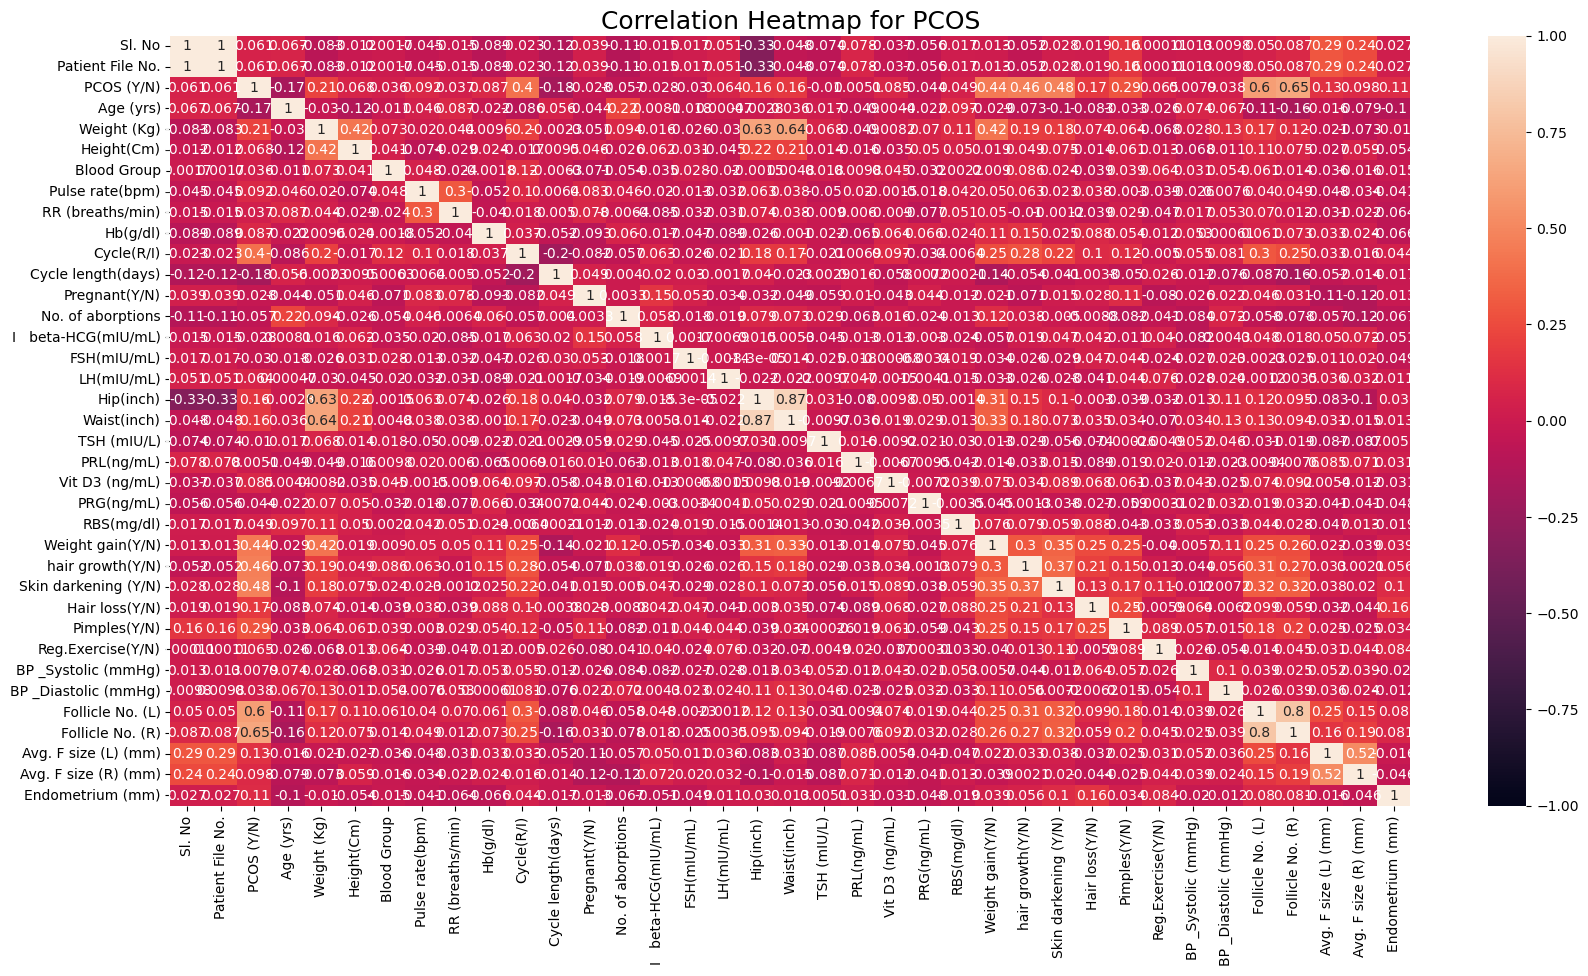

In [15]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(pcos_without_inf.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for PCOS', fontdict={'fontsize':18}, pad=5);

**As we can see from the correlation heatmap, we can't understand that which factor is responsible for PCOS. We will perform ANOVA testing.**

In [39]:
pcos_without_inf_anova= pcos_without_inf[['PCOS (Y/N)', 'BMI',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)',
       'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']]

In [40]:
#Renaming the columns for better understanding
pcos_without_inf_anova=pcos_without_inf_anova.rename(columns = {'PCOS (Y/N)':'PCOS','Pulse rate(bpm)':'Pulse rate',
       'RR (breaths/min)':'RR', 'Hb(g/dl)':'HB', 'Cycle length(days)':'Cycle length',
        'I   beta-HCG(mIU/mL)':'I   beta-HCG', 'II    beta-HCG(mIU/mL)':'II    beta-HCG',
       'FSH(mIU/mL)':'FSH', 'LH(mIU/mL)':'LH',
        'TSH (mIU/L)':'TSH', 'AMH(ng/mL)':'AMH', 'PRL(ng/mL)':'PRL',
       'Vit D3 (ng/mL)':'Vit D3', 'PRG(ng/mL)':'PRL', 'RBS(mg/dl)':'RBS', 'BP _Systolic (mmHg)':'BP _Systolic',
       'BP _Diastolic (mmHg)':'BP _Diastolic', 'Follicle No. (R)':'Follicle No.',
       'Avg. F size (L) (mm)':'Avg. F size (L)', 'Avg. F size (R) (mm)':'Avg. F size (R)', 'Endometrium (mm)':'Endometrium'})

In [18]:
pcos_without_inf_anova.shape

(541, 22)

Hypothetis Testing

In [20]:
pg.anova(dv = 'PCOS', between = ['BMI'], data = pcos_without_inf_anova)

,Source,ddof1,ddof2,F,p-unc,np2
0,BMI,107,433,1.014532,0.450155,0.20045


In [32]:
pg.anova(dv = 'PCOS', between = ['RR'], data = pcos_without_inf_anova)

,Source,ddof1,ddof2,F,p-unc,np2
0,RR,7,533,1.382794,0.210059,0.017837


In [36]:
pg.anova(dv = 'PCOS', between = ['Vit D3'], data = pcos_without_inf_anova)

,Source,ddof1,ddof2,F,p-unc,np2
0,Vit D3,330,210,1.176672,0.099524,0.649007


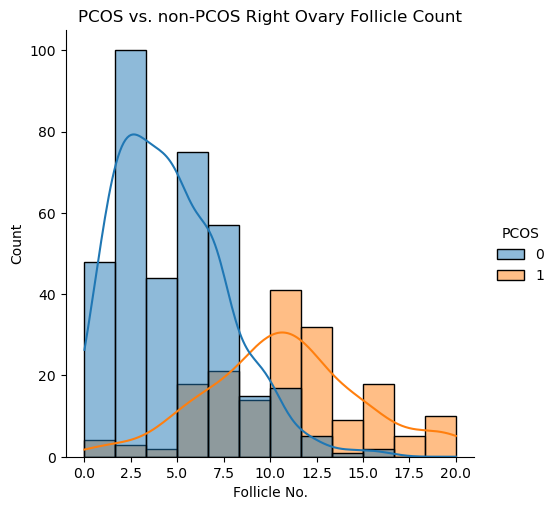

In [42]:
sns.displot(data = pcos_without_inf_anova, x = "Follicle No.", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Right Ovary Follicle Count")

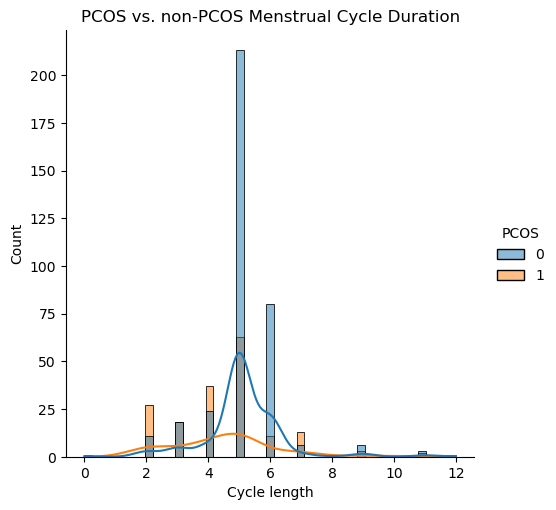

In [43]:
sns.displot(data = pcos_without_inf_anova, x = "Cycle length", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Menstrual Cycle Duration")

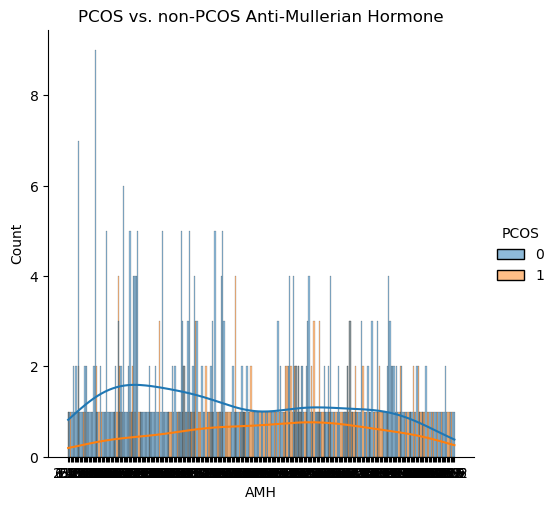

In [44]:
sns.displot(data = pcos_without_inf_anova, x = "AMH", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Anti-Mullerian Hormone")